# random_forest

### 모듈 및 데이터 로딩

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [4]:
mem = pd.read_csv('member.csv')
tran = pd.read_csv('transaction.csv')


In [5]:
mem.shape, tran.shape

((64000, 6), (196836, 3))

In [7]:
mem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 6 columns):
id             64000 non-null int64
recency        64000 non-null int64
zip_code       64000 non-null object
is_referral    64000 non-null int64
channel        64000 non-null object
conversion     64000 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.9+ MB


In [8]:
mem.describe()

,id,recency,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000
mean,550694.137797,5.763734,0.502250,0.146781
std,259105.689773,3.507592,0.499999,0.353890
min,100001.000000,1.000000,0.000000,0.000000
25%,326772.000000,2.000000,0.000000,0.000000
50%,551300.000000,6.000000,1.000000,0.000000
75%,774914.500000,9.000000,1.000000,0.000000
max,999997.000000,12.000000,1.000000,1.000000


In [9]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 3 columns):
id              196836 non-null int64
num_item        196836 non-null int64
total_amount    196836 non-null int64
dtypes: int64(3)
memory usage: 4.5 MB


In [10]:
tran.describe()

,id,num_item,total_amount
count,196836.000000,196836.000000,196836.000000
mean,550557.552932,3.078365,21837.102969
std,259254.795613,1.478408,8218.005565
min,100001.000000,1.000000,8000.000000
25%,326719.000000,2.000000,15000.000000
50%,550918.000000,3.000000,22000.000000
75%,774916.000000,4.000000,29000.000000
max,999997.000000,6.000000,38000.000000


In [12]:
tran.head()

,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000
2,906145,4,33000
3,184478,4,29000
4,394235,4,33000


In [13]:
mem.head()

,id,recency,zip_code,is_referral,channel,conversion
0,906145,10,Surburban,0,Phone,0
1,184478,6,Rural,1,Web,0
2,394235,7,Surburban,1,Web,0
3,130152,9,Rural,1,Web,0
4,940352,2,Urban,0,Web,0


### 아이템별 평균 가격 확인

In [14]:
tran['total_amount'] /tran['num_item']

0          6800.000000
1         27000.000000
2          8250.000000
3          7250.000000
4          8250.000000
              ...     
196831     4800.000000
196832     5200.000000
196833     7333.333333
196834     6000.000000
196835     6666.666667
Length: 196836, dtype: float64

In [15]:
tran['avg_price'] = tran['total_amount'] /tran['num_item']

In [16]:
tran.head()

,id,num_item,total_amount,avg_price
0,906145,5,34000,6800.0
1,906145,1,27000,27000.0
2,906145,4,33000,8250.0
3,184478,4,29000,7250.0
4,394235,4,33000,8250.0


### 데이터 합치기

In [18]:
## GROUPBY를 활용하여 id별로 1줄 데이터 요약
tran_mean = tran.groupby('id').mean()

In [21]:
tran_cnt = tran['id'].value_counts()
tran_cnt

446874    5
473857    5
384266    5
648461    5
130318    5
         ..
674652    1
670546    1
192229    1
720615    1
789077    1
Name: id, Length: 64000, dtype: int64

In [22]:
tran_df = pd.concat([tran_mean, tran_cnt], axis = 1)

In [23]:
tran_df

,num_item,total_amount,avg_price,id
100001,3.500000,26000.000000,7500.000000,2
100008,5.000000,26000.000000,5200.000000,1
100032,2.666667,20666.666667,9366.666667,3
100036,3.000000,25800.000000,13273.333333,5
100070,3.250000,21250.000000,8537.500000,4
...,...,...,...,...
999932,5.000000,32000.000000,6400.000000,1
999981,2.000000,22750.000000,12875.000000,4
999990,3.000000,28000.000000,10388.888889,3
999995,2.000000,27000.000000,13500.000000,1


In [24]:
tran_df.columns = ['um_item', 'total_amount', 'avg_price', 'count']

In [25]:
tran_df

,um_item,total_amount,avg_price,count
100001,3.500000,26000.000000,7500.000000,2
100008,5.000000,26000.000000,5200.000000,1
100032,2.666667,20666.666667,9366.666667,3
100036,3.000000,25800.000000,13273.333333,5
100070,3.250000,21250.000000,8537.500000,4
...,...,...,...,...
999932,5.000000,32000.000000,6400.000000,1
999981,2.000000,22750.000000,12875.000000,4
999990,3.000000,28000.000000,10388.888889,3
999995,2.000000,27000.000000,13500.000000,1


In [28]:
mem.set_index('id', inplace = True)

In [29]:
mem

,recency,zip_code,is_referral,channel,conversion
id,,,,,
906145,10,Surburban,0,Phone,0
184478,6,Rural,1,Web,0
394235,7,Surburban,1,Web,0
130152,9,Rural,1,Web,0
940352,2,Urban,0,Web,0
...,...,...,...,...,...
838295,10,Urban,0,Web,0
547316,5,Urban,1,Phone,0
131575,6,Urban,1,Phone,0


In [30]:
mem.join(tran_df)

,recency,zip_code,is_referral,channel,conversion,um_item,total_amount,avg_price,count
id,,,,,,,,,
906145,10,Surburban,0,Phone,0,3.333333,31333.333333,14016.666667,3
184478,6,Rural,1,Web,0,4.000000,29000.000000,7250.000000,1
394235,7,Surburban,1,Web,0,4.000000,20500.000000,5125.000000,2
130152,9,Rural,1,Web,0,1.750000,20750.000000,14875.000000,4
940352,2,Urban,0,Web,0,3.000000,31000.000000,10333.333333,1
...,...,...,...,...,...,...,...,...,...
838295,10,Urban,0,Web,0,3.500000,26000.000000,8012.500000,4
547316,5,Urban,1,Phone,0,1.800000,17800.000000,11300.000000,5
131575,6,Urban,1,Phone,0,4.000000,30500.000000,7833.333333,2


In [31]:
data = mem.join(tran_df)

In [32]:
data.isna().sum()

recency         0
zip_code        0
is_referral     0
channel         0
conversion      0
um_item         0
total_amount    0
avg_price       0
count           0
dtype: int64

### 카테고리 데이터 처리

In [34]:
data['zip_code'].unique()

array(['Surburban', 'Rural', 'Urban'], dtype=object)

In [35]:
data['channel'].unique()

array(['Phone', 'Web', 'Multichannel'], dtype=object)

In [36]:
data = pd.get_dummies(data, columns=['zip_code', 'channel'], drop_first = True)

## 카테고리성 데이터를 원핫인코딩 형태로 정리할 경우, 


### 카테고리성 데이터를 원핫인코딩 형태로 정리할 경우,
- 모든 카테고리가 변수로 지정되지 않는다. 
- n개 카테고리 갯 더미 적용 시, n-1개가 형성이 되며, 1 ~ n-1 변수가 모두 0일 경우, n인 상황을 표현하는 것이다. 
- n이란 변수는 1 ~ n-1까지의 변수를 통해 설명됨
- 자유도랑 개념이 유사하다(기능이나 작동방식은 전혀 다르다.)

In [37]:
data.head()

,recency,is_referral,conversion,um_item,total_amount,avg_price,count,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
id,,,,,,,,,,,
906145,10,0,0,3.333333,31333.333333,14016.666667,3,1,0,1,0
184478,6,1,0,4.000000,29000.000000,7250.000000,1,0,0,0,1
394235,7,1,0,4.000000,20500.000000,5125.000000,2,1,0,0,1
130152,9,1,0,1.750000,20750.000000,14875.000000,4,0,0,0,1
940352,2,0,0,3.000000,31000.000000,10333.333333,1,0,1,0,1


### Random Forest 모델 만들기
- Dicision Tree 모델의 adv모드

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('conversion',axis = 1), data['conversion'], test_size = 0.3, random_state = 100)

In [41]:
model = RandomForestClassifier(max_depth= 10, random_state=100)
model.fit(X_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

### 예측 및 평가

In [42]:
pred = model.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [44]:
accuracy_score(y_test, pred), confusion_matrix(y_test, pred)

(0.8741666666666666, array([[16356,   107],
        [ 2309,   428]], dtype=int64))

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     16463
           1       0.80      0.16      0.26      2737

    accuracy                           0.87     19200
   macro avg       0.84      0.57      0.60     19200
weighted avg       0.87      0.87      0.84     19200



In [54]:
rf = RandomForestRegressor(max_depth=10, random_state=100)

In [55]:
rf.fit(X_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=100, verbose=0,
                      warm_start=False)

In [56]:
pred = rf.predict(X_test)

In [57]:
pred

array([0.        , 0.04335665, 0.        , ..., 0.1006308 , 0.        ,
       0.05426333])

### 0~1 사이의 연속형 변수(확률값) 0 과 1로 변환하기

In [58]:
def conv(x):
    if x >= 0.5: ## 0.5는 thresholds이다.
        return 1
    else:
        return 0

In [59]:
pd_result = pd.Series(pred).apply(lambda x: conv(x)) 

In [60]:
pd_result ## 예측 결과가 1과 0으로 산출된다.

0        0
1        0
2        0
3        1
4        0
        ..
19195    0
19196    0
19197    0
19198    0
19199    0
Length: 19200, dtype: int64

In [61]:
result_comp = [1 if x >= 0.5 else 0 for x in pred]

In [66]:
result_comp_edit = [1 if x >= 0.3 else 0 for x in pred]

In [62]:
result_comp

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [63]:
accuracy_score(y_test, result_comp)

0.8788541666666667

In [65]:
print(classification_report(y_test, result_comp)) ## thresholds를 수정함으로서, 어느부분에 가중을 둘지 정할 수 있다. 

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     16463
           1       0.78      0.21      0.33      2737

    accuracy                           0.88     19200
   macro avg       0.83      0.60      0.63     19200
weighted avg       0.87      0.88      0.85     19200



In [67]:
print(classification_report(y_test, result_comp_edit)) ## 업무 상 가중치를 둘 필요가 없을 경우에는 f1-score가 높은 편이 일반적으로 좋다. 

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     16463
           1       0.54      0.34      0.42      2737

    accuracy                           0.86     19200
   macro avg       0.72      0.65      0.67     19200
weighted avg       0.85      0.86      0.85     19200



### 변수 중요성(feature importance)

In [68]:
rf.feature_importances_

array([0.05208932, 0.02036588, 0.37866039, 0.1393446 , 0.22702901,
       0.16622983, 0.00260073, 0.0044598 , 0.00544135, 0.0037791 ])

In [69]:
X_train.columns

Index(['recency', 'is_referral', 'um_item', 'total_amount', 'avg_price',
       'count', 'zip_code_Surburban', 'zip_code_Urban', 'channel_Phone',
       'channel_Web'],
      dtype='object')

<AxesSubplot:>

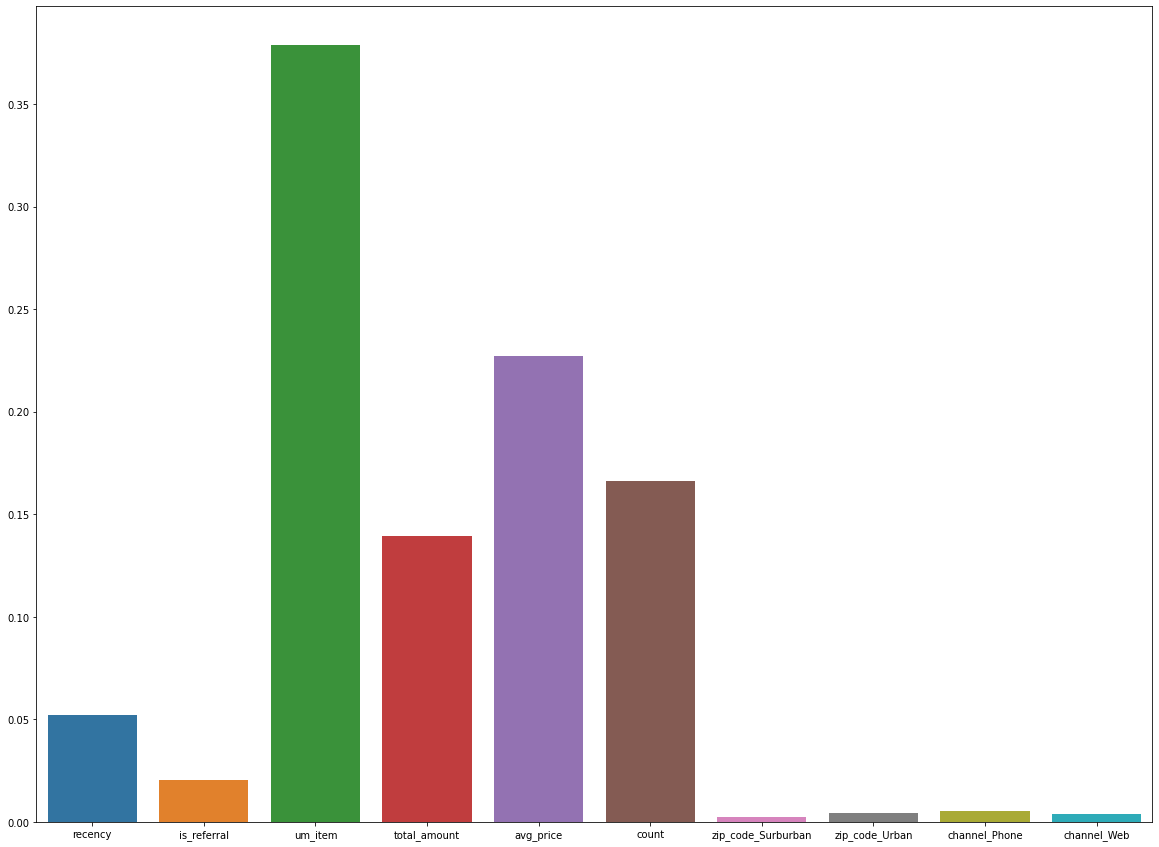

In [74]:
plt.figure(figsize = (20,15))
sns.barplot(x = X_train.columns, y = rf.feature_importances_)